# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data dictionary

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
    0: Typical Angina: Chest pain related decrease blood supply to the heart 
    1: Atypical Angeina: Chest pain not related to 
    heart 
    2: Non-anginal pain: typically esophagal spasms(non heart related) 
    3: Asymptomatic: chest pain not showing signs of disease

    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl s erum = LDL + HDL +.2triglvcerides
    above 200 is cause for concern 
    
    fbs - (fasting blood sugar > 120 mg/dl) - (1 = true; 0 = false) '>126' mg/dL signals diabetes

    restecg - resting electrocardiographic results
    0: Nothing to note 
    1: ST-T wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat 
    2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber

    thalach - maximum heart rate achieved
    exang exercise induced angina - (1 = yes; 0 = no)
    oldpeakST - depression induced by exercise relative to rest
    slope the - slope of the peak exercise ST segment
    ca number of major vessels - (0-3) colored by flourosopy
    thal 3 = normal; 6 = fixed defect; 7 = reversable defect
    target - 1 or 0

In [3]:
df= pd.read_csv('datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploring the data

In [4]:
df.shape

(1025, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

## Filtering out the categorical variables

In [8]:
categorical=[]
def filter_cat(cat):
    for i in cat:
        if df[i].nunique() < 20:            
            categorical.append(i)

In [9]:
filter_cat(df.columns)
categorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Exploratory Data Analysis

## Checking if the dataset is balanced or not

Text(0.5, 1.0, 'Patients having heart attack or not')

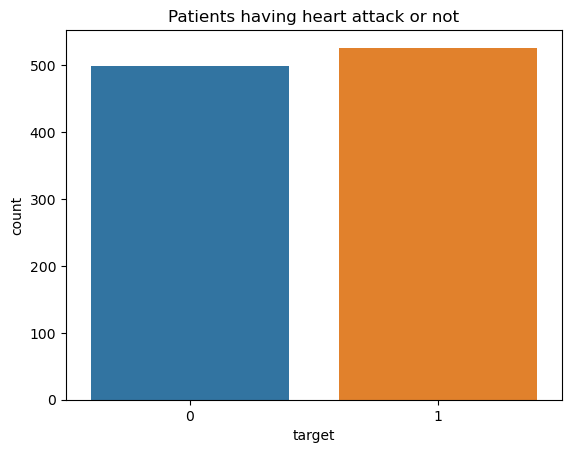

In [10]:
sns.countplot(x='target', data=df)
plt.title("Patients having heart attack or not")
#from the count plot, it looks like the dataset is balanced

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Text(0, 0.5, 'Max heart rate')

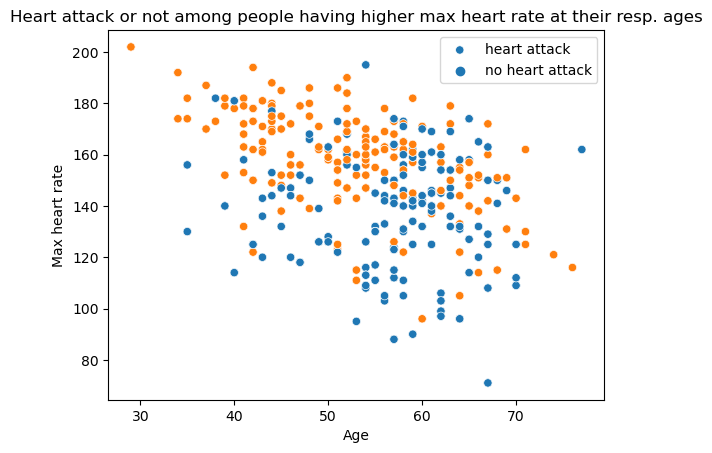

In [12]:
# check relation between age and max heart rate achieved among all those tested positive or negative
sns.scatterplot(x="age", y="thalach", data=df,  hue="target")
plt.legend(["heart attack","no heart attack"])
plt.title("Heart attack or not among people having higher max heart rate at their resp. ages")
plt.xlabel("Age")
plt.ylabel("Max heart rate")

Text(0.5, 1.0, 'Heart attacks among patients of different sex')

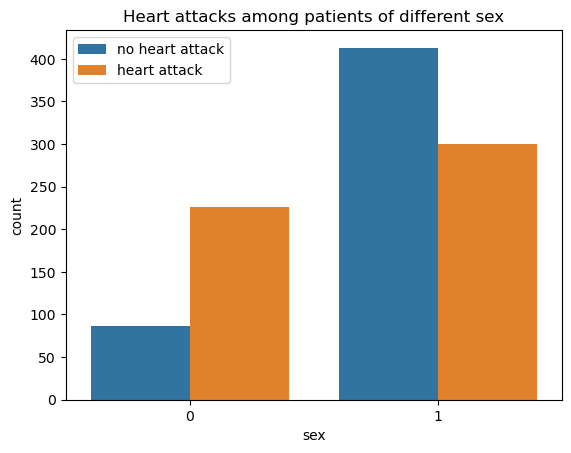

In [13]:
# heart disease found in patients of different sex
sns.countplot(x="sex", data=df, hue="target")
plt.legend(["no heart attack","heart attack"])
plt.title("Heart attacks among patients of different sex")

C:\Users\mohda\AppData\Local\Temp\ipykernel_13032\4084489773.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["chol"])


Text(0.5, 0, 'Cholestrol')

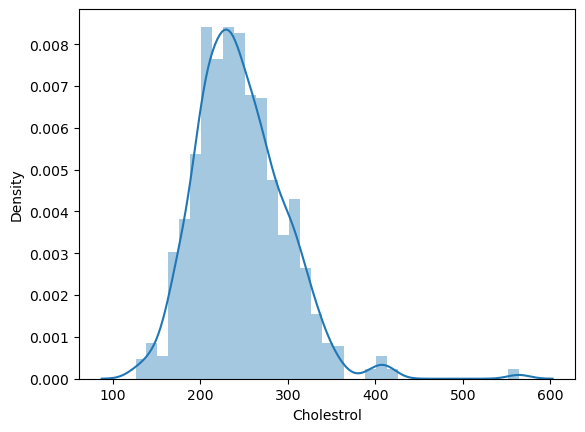

In [14]:
# checking distribution of cholestrol
sns.distplot(df["chol"])
plt.xlabel("Cholestrol")

In [15]:
# distribution looks normal but is a bit positively skewed

C:\Users\mohda\AppData\Local\Temp\ipykernel_13032\3085680222.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["trestbps"])


Text(0.5, 0, 'Resting Blood pressure')

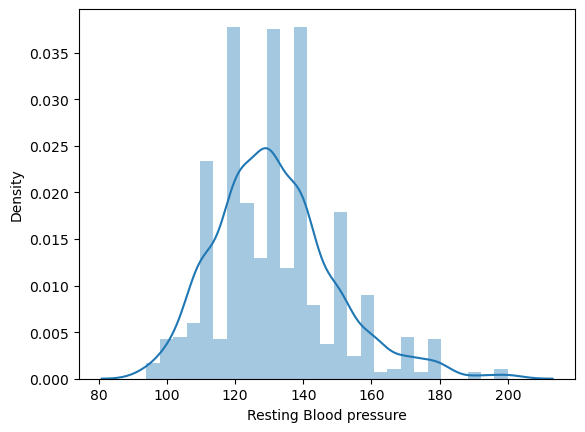

In [16]:
sns.distplot(df["trestbps"])
plt.xlabel("Resting Blood pressure")

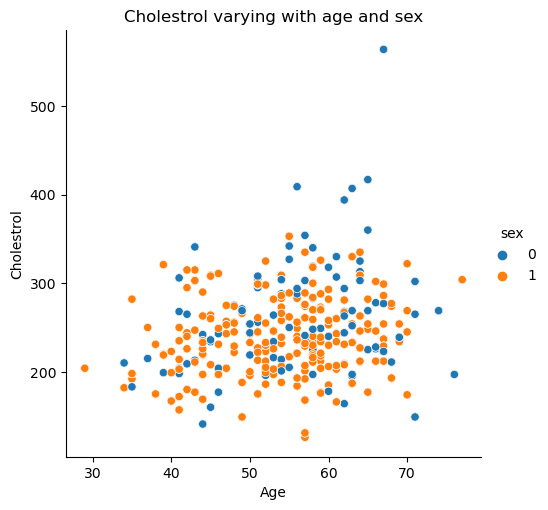

In [17]:
# who have higher cholestrol at particular ages, males or females
sns.relplot(kind="scatter", x="age", y="chol", data=df, hue="sex")
plt.title("Cholestrol varying with age and sex")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.show()

Text(0.5, 1.0, 'Are people with high max heart rate having high blood sugar at their resp. ages')

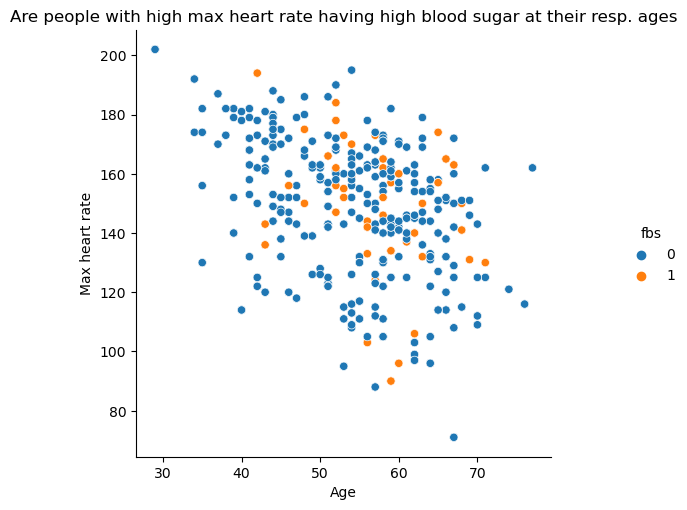

In [18]:
# lets check if max heart was achieved by people having very high fasting blood sugar
sns.relplot(kind="scatter", x="age", y="thalach", data=df, hue="fbs")
plt.ylabel("Max heart rate")
plt.xlabel("Age")
plt.title("Are people with high max heart rate having high blood sugar at their resp. ages")

In [19]:
# here we can see that people having high max heart rate generally have high sugar

# Feature Engineering and Feature Selection

<Axes: >

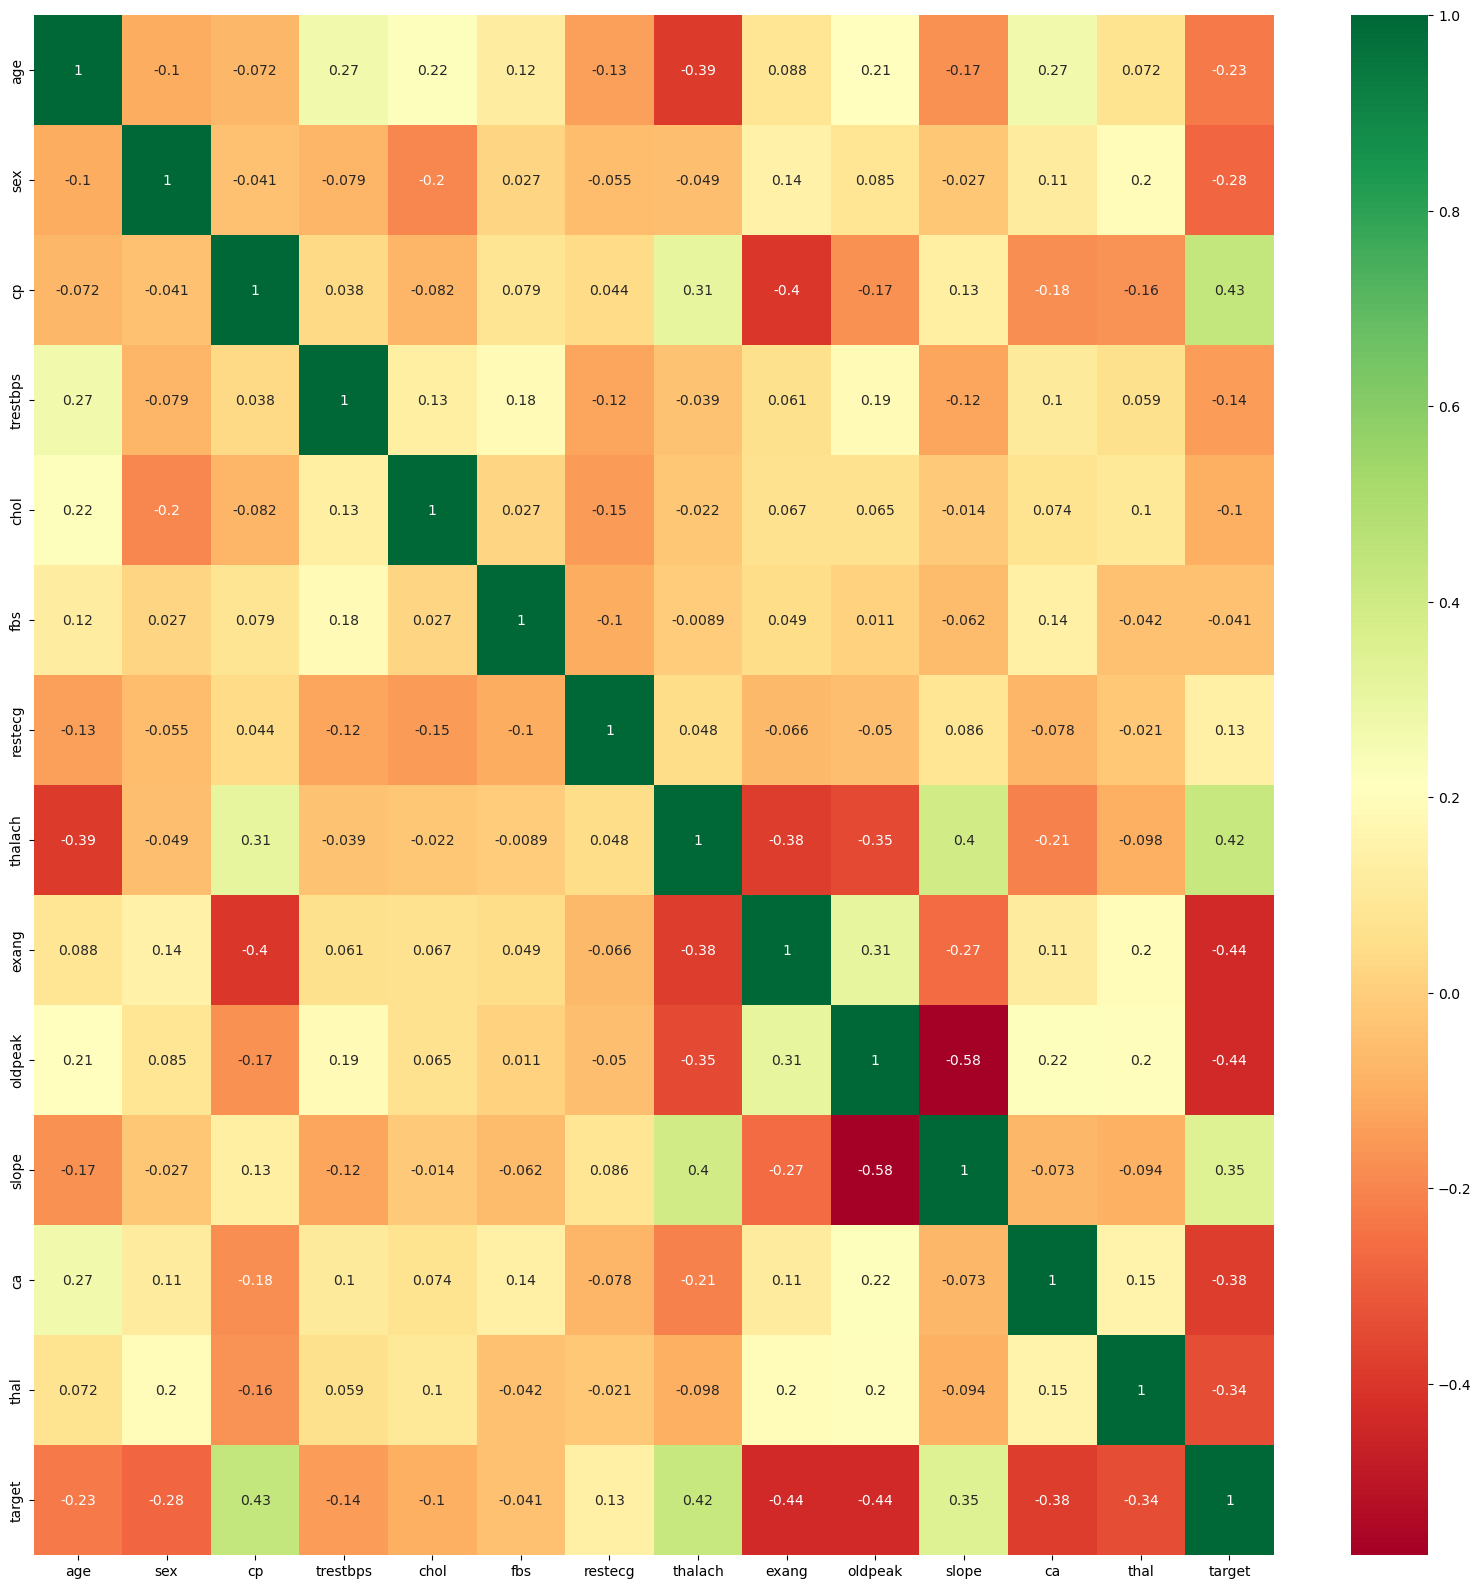

In [20]:
corr_mat=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True, cmap='RdYlGn')

In [21]:
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [22]:
# looking at the features having a high correlation with our target variable
corr_features=[] 
mat= corr_mat.iloc[:-1]["target"]
for index,i in enumerate(mat):
    if i >= 0.4 or i <= -0.4:
        corr_features.append(mat.index[index])
corr_features

['cp', 'thalach', 'exang', 'oldpeak']

<Figure size 3000x3000 with 0 Axes>

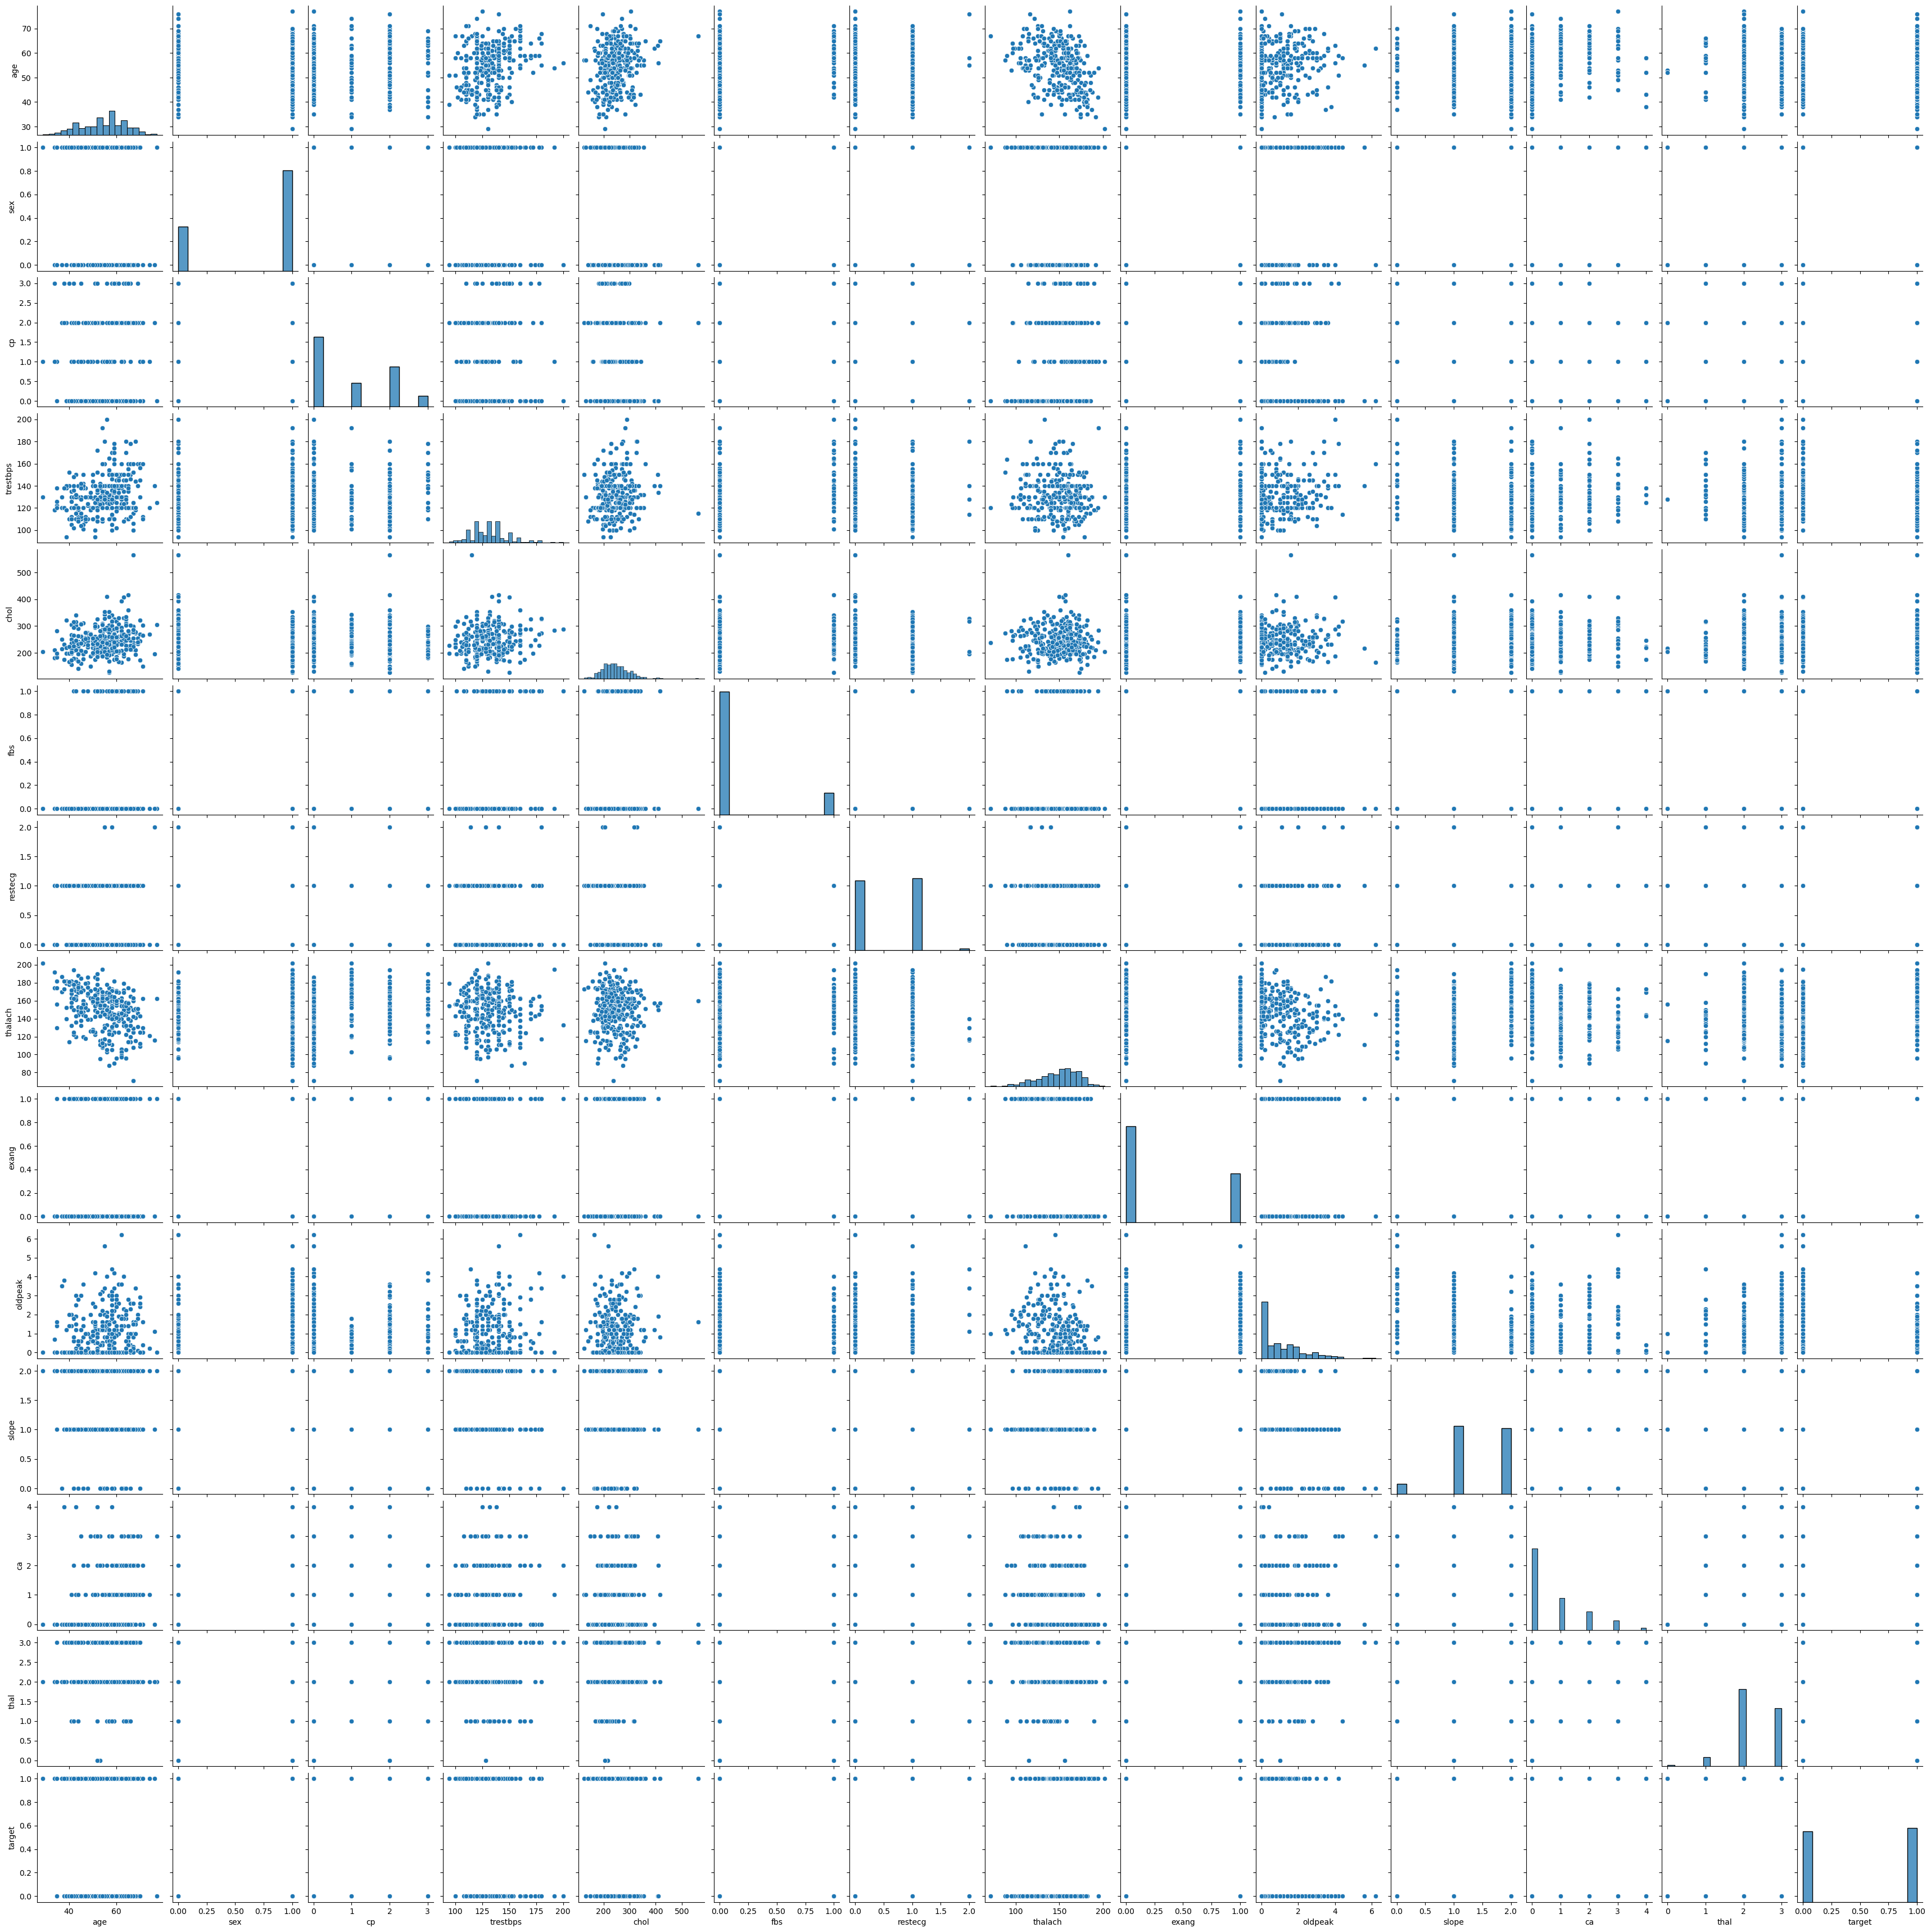

In [23]:
plt.figure(figsize=(30,30))
sns.pairplot(df)
plt.show()

In [24]:
features=df.drop("target", axis=1)
target=df["target"]

# RANDOM FOREST IMPLEMENATATION

Accuracy: 98.38%
{'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 98}
[[147   3]
 [  2 156]]


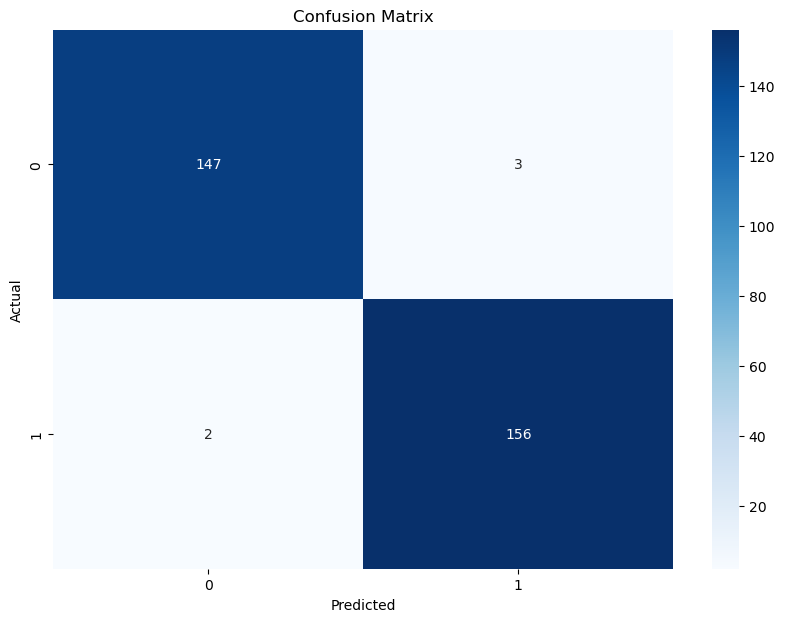

Cross-validation accuracy: 97.46%


In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0, stratify=target)

# Define the hyperparameters for RandomizedSearchCV
hyperparameters = {
    'n_estimators': randint(10, 100),             
    'max_features': ['sqrt', 'log2'],           
    'max_depth': randint(3, 10),            
    'min_samples_split': randint(10, 20),         
    'min_samples_leaf': randint(5, 20),  
    'bootstrap': [True, False]                    
}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=0)

# Use RandomizedSearchCV to find the best hyperparameters
clf = RandomizedSearchCV(rf, hyperparameters, n_iter=50, cv=7, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

# Predict the target for the test set
y_pred = clf.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the best hyperparameters found by RandomizedSearchCV
print(clf.best_params_)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate using cross-validation
cv_scores = cross_val_score(clf, features, target, cv=7)
print(f'Cross-validation accuracy: {np.mean(cv_scores) * 100:.2f}%')


In [ ]:
import joblib
joblib.dump(clf,'Heart.pkl')

In [ ]:
from joblib import dump, load

In [ ]:
dump(clf,'Heart.joblib')